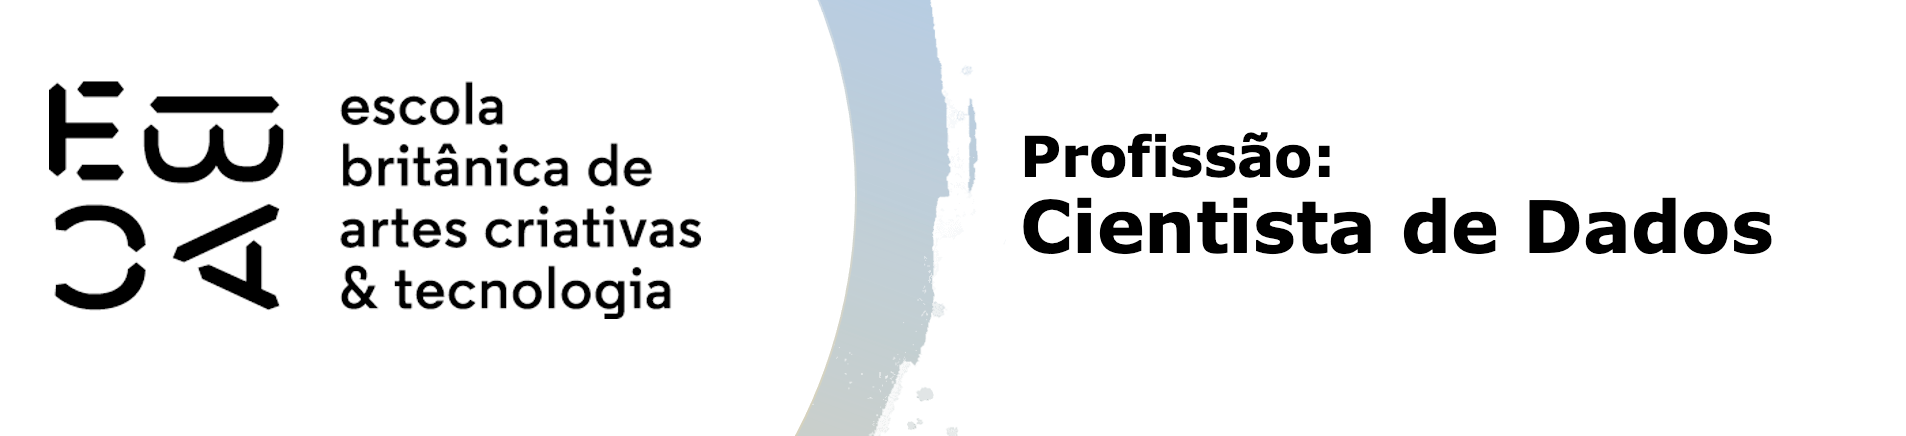

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [9]:
df1 = df[['Administrative', 'Administrative_Duration', 'Informational',
          'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']]
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 578.1 KB


In [11]:
df1 = df1.astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
dtypes: float64(6)
memory usage: 578.1 KB


In [12]:
padronizador = StandardScaler()
df1_padronizado = padronizador.fit_transform(df1)
df2 = pd.DataFrame(df1_padronizado)
df2.columns = ['Administrative', 'Administrative_Duration','Informational', 
               'Informational_Duration','ProductRelated','ProductRelated_Duration']
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [13]:
# Utilizando o Método do Cotovelo:

  0%|          | 0/9 [00:00<?, ?it/s]

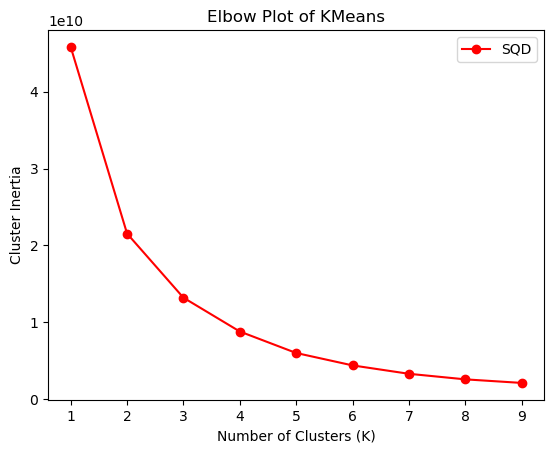

In [14]:
SQD = []
K = range(1,10)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(df1)
    SQD.append(km.inertia_)
    
df3 = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})

df3.plot(x = 'num_clusters', y = 'SQD', marker='o', color = 'r')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cluster Inertia")
plt.title("Elbow Plot of KMeans")
plt.show();

  0%|          | 0/9 [00:00<?, ?it/s]

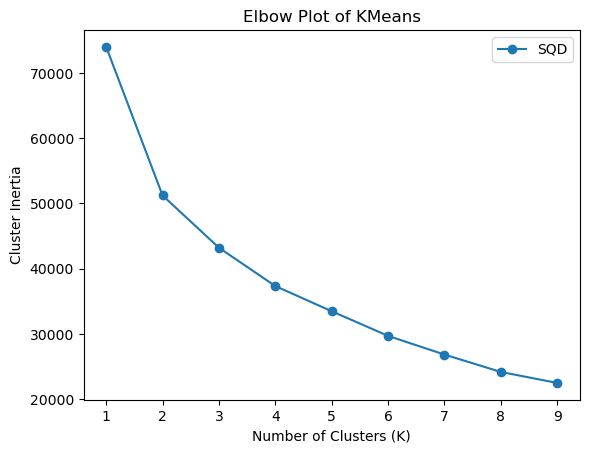

In [15]:
# dataset padronizado (df2):

SQD = []
K = range(1,10)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    SQD.append(km.inertia_)

df4 = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df4.plot(x = 'num_clusters', y = 'SQD', marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cluster Inertia")
plt.title("Elbow Plot of KMeans")
plt.show();

In [16]:
# Utilizando o Coeficiente de Silueta:

  0%|          | 0/9 [00:00<?, ?it/s]

<AxesSubplot:xlabel='n_clusters'>

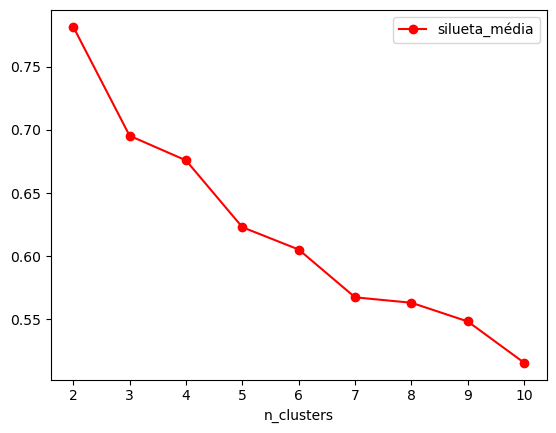

In [17]:
siluetas = []

max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters+1)):
    
    km = KMeans(n_clusters=n_clusters).fit(df1)
     
    siluetas.append(silhouette_score(df1, km.labels_))
    
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o', color='r')

In [18]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(df1)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(df1, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 2  The average silhouette_score is : 0.7816224489496111
For no of clusters = 3  The average silhouette_score is : 0.6953321839111231
For no of clusters = 4  The average silhouette_score is : 0.675881159765471
For no of clusters = 5  The average silhouette_score is : 0.623336950132954
For no of clusters = 6  The average silhouette_score is : 0.6052885108477998
For no of clusters = 7  The average silhouette_score is : 0.5915186844885775
For no of clusters = 8  The average silhouette_score is : 0.5665516635216356
For no of clusters = 9  The average silhouette_score is : 0.5338235350421909
For no of clusters = 10  The average silhouette_score is : 0.5207480881533307


  0%|          | 0/9 [00:00<?, ?it/s]

<AxesSubplot:xlabel='n_clusters'>

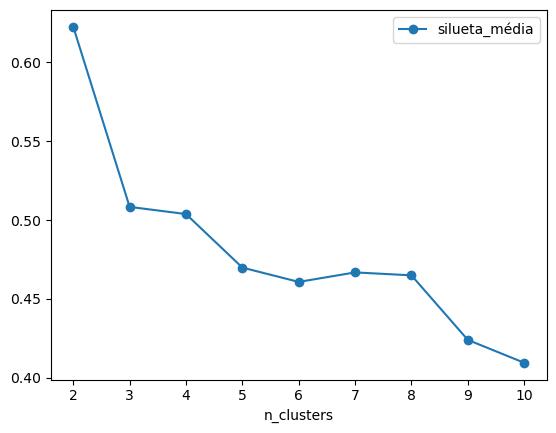

In [19]:
# dataset padronizado (df2):

siluetas = []

max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters+1)):
    
    km = KMeans(n_clusters=n_clusters).fit(df2)
     
    siluetas.append(silhouette_score(df2, km.labels_))

df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')

In [20]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(df2)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(df2, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 2  The average silhouette_score is : 0.6224236579741643
For no of clusters = 3  The average silhouette_score is : 0.5089822476808471
For no of clusters = 4  The average silhouette_score is : 0.5054563216579067
For no of clusters = 5  The average silhouette_score is : 0.471280258824075
For no of clusters = 6  The average silhouette_score is : 0.4610355289470303
For no of clusters = 7  The average silhouette_score is : 0.45966519830003477
For no of clusters = 8  The average silhouette_score is : 0.4636548109237195
For no of clusters = 9  The average silhouette_score is : 0.42388200856549885
For no of clusters = 10  The average silhouette_score is : 0.42600879180942836


**Para o dataset normal:** 

- pelo método do cotovelo: entre 2 e 3 clusters;
- pelo coeficiente de silueta: entre 2 e 3 clusters.

**Para o dataset padronizado:** 

- pelo método do cotovelo:  entre 2 e 3 clusters;
- pelo coeficiente de silueta: entre 2 e 3 clusters.



## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

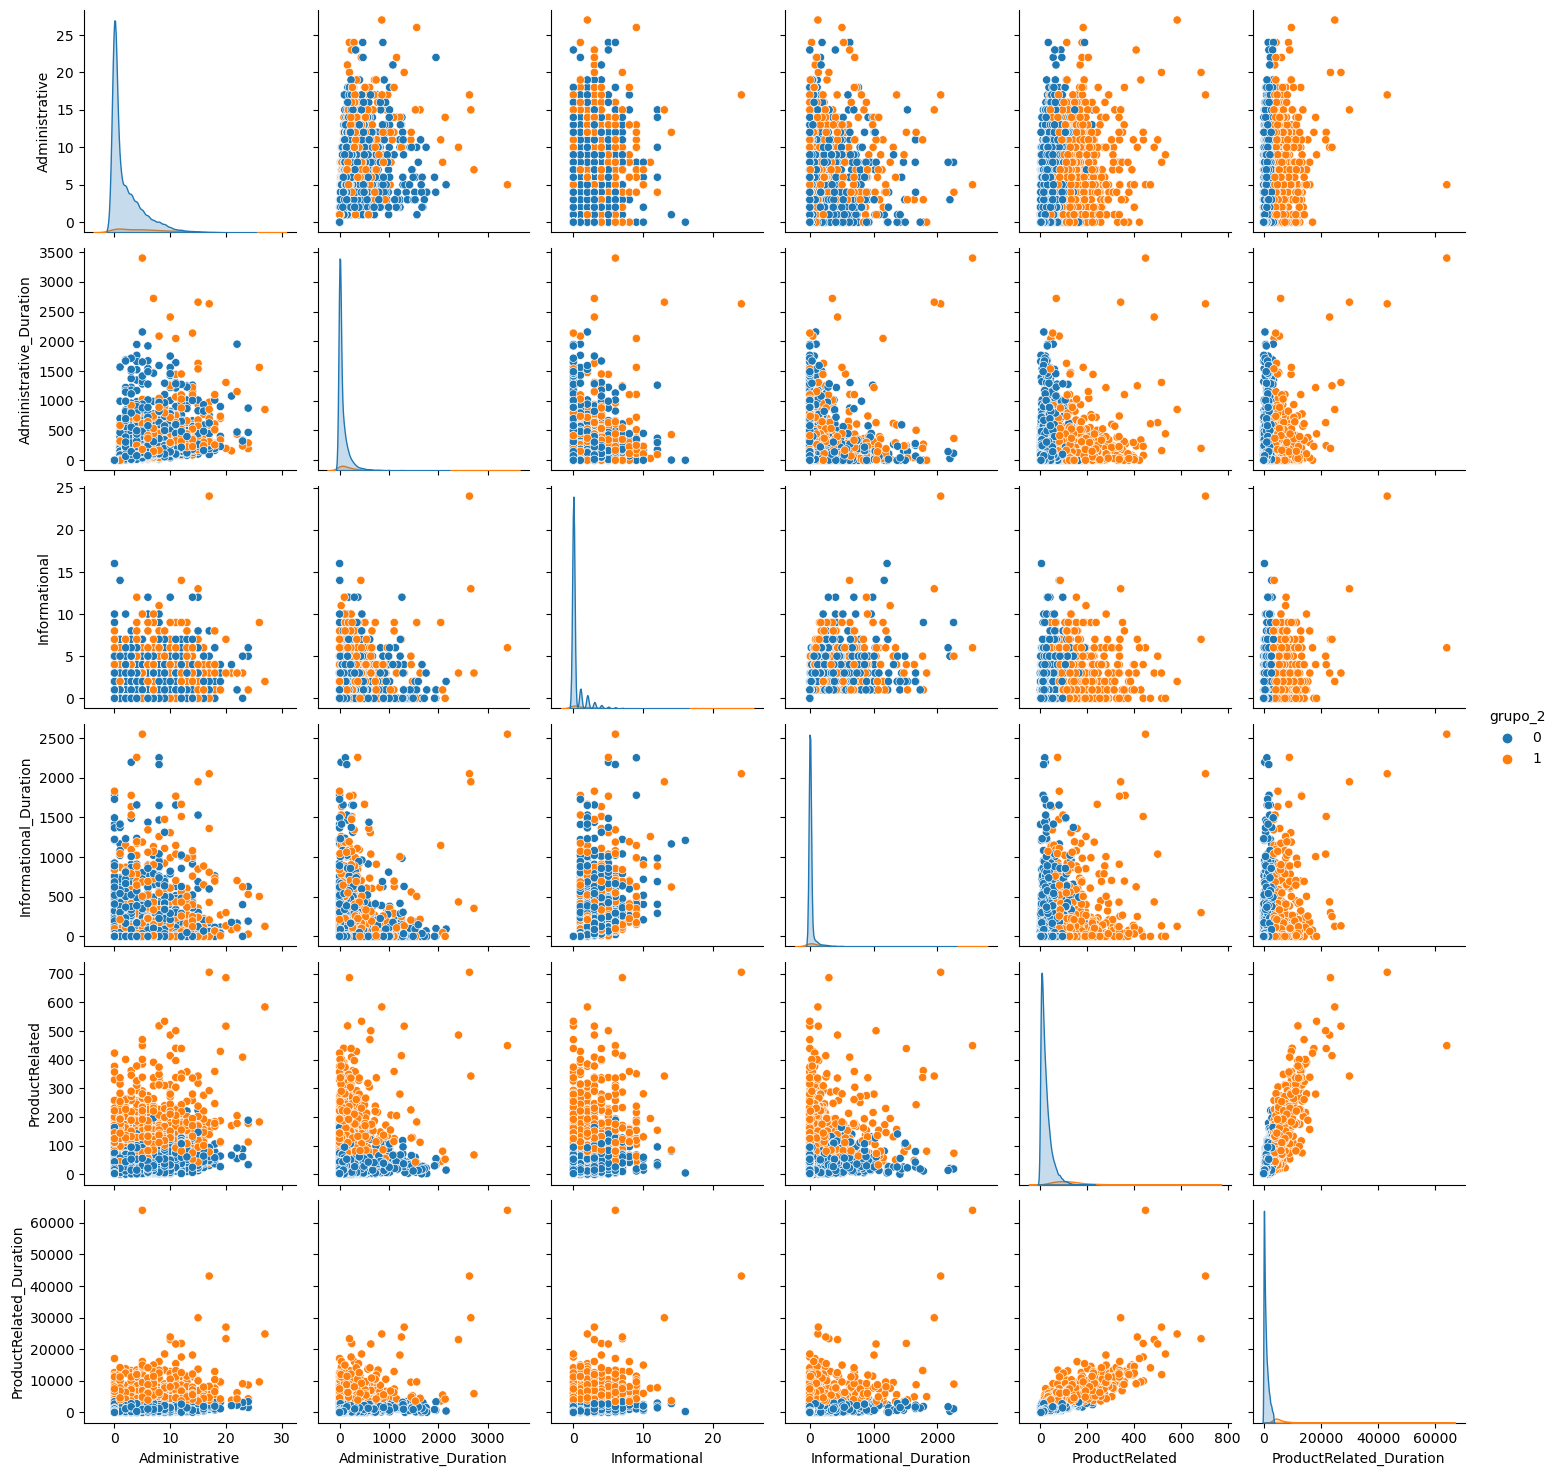

In [21]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(df1)
df1['grupo_2'] = kmeans.labels_.astype('str')
sns.pairplot(df1, hue='grupo_2')

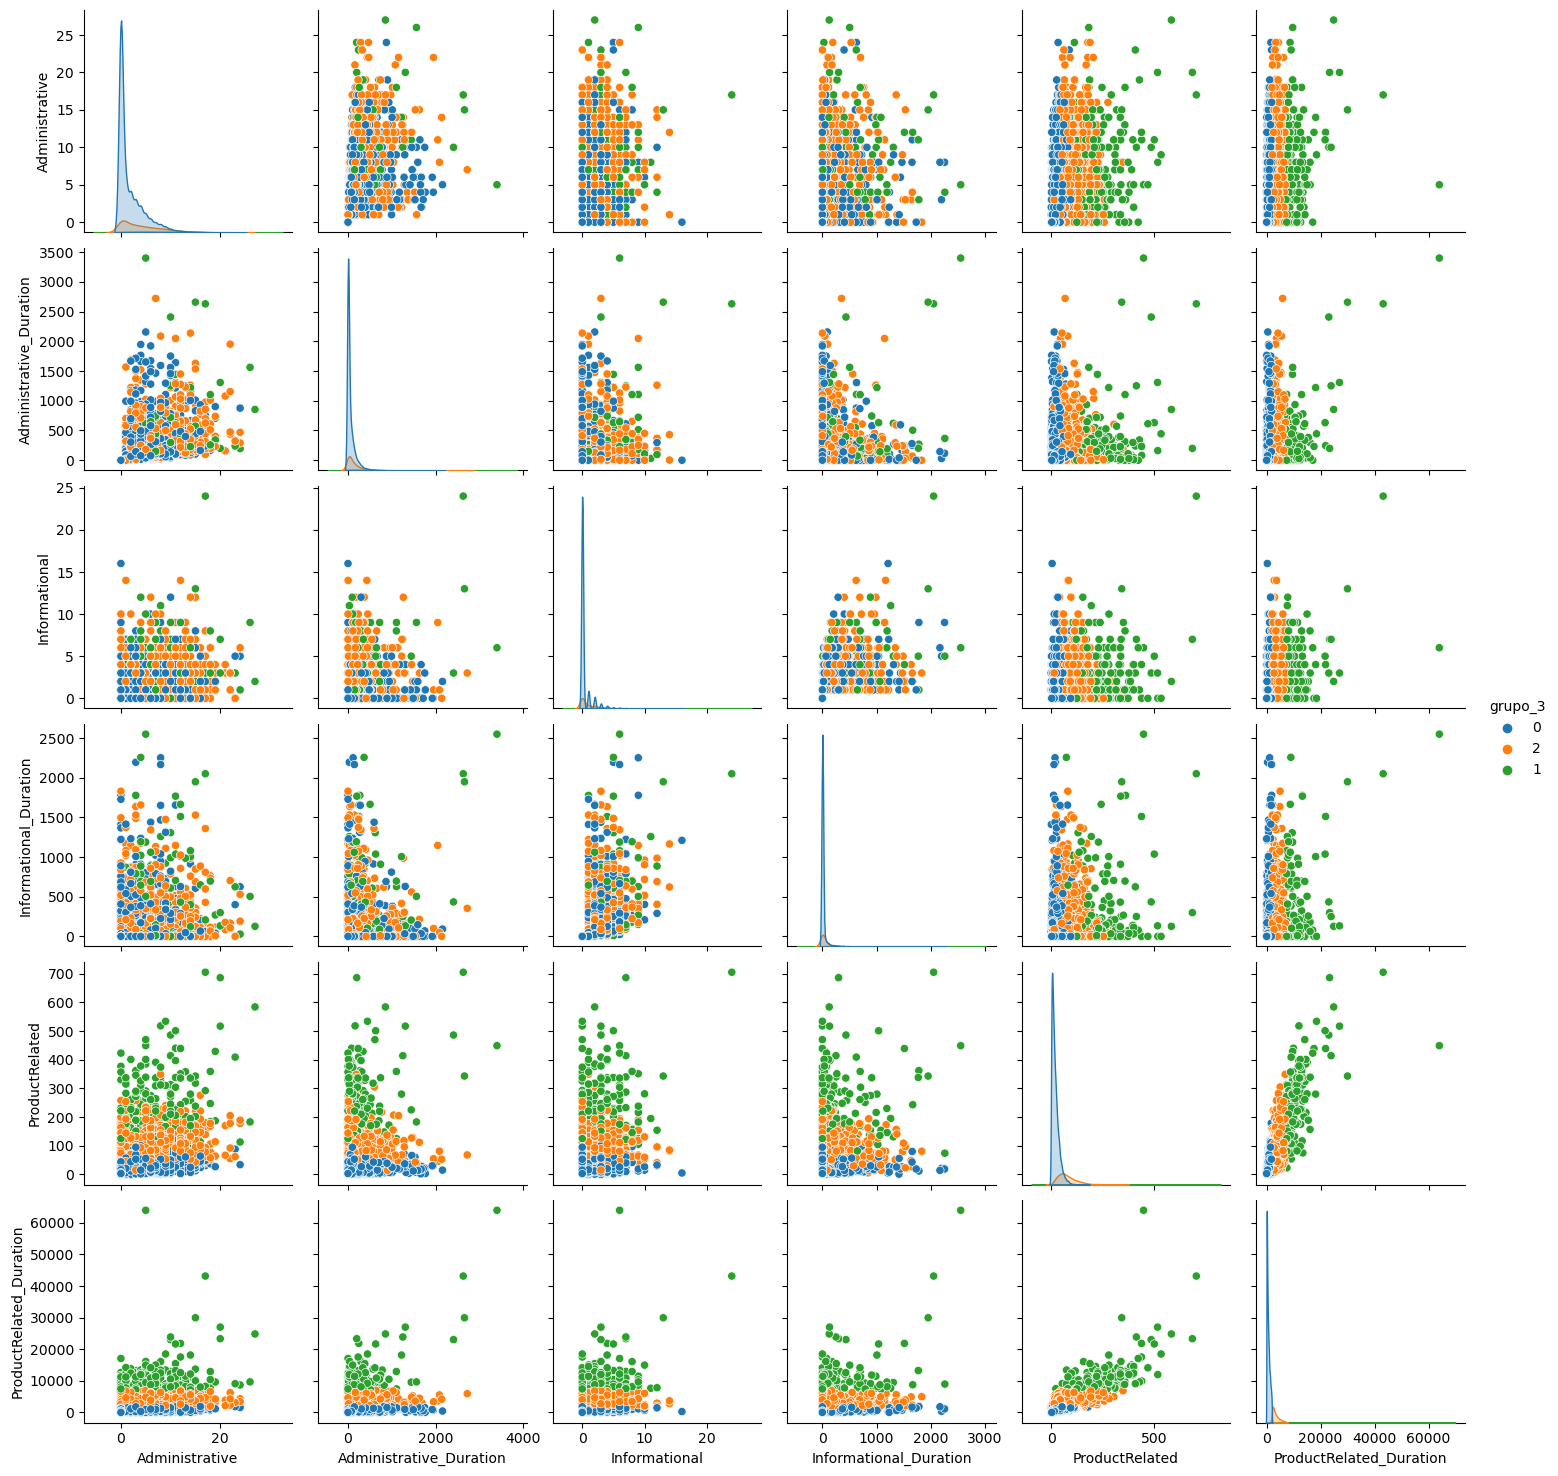

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(df1)
df1['grupo_3'] = kmeans.labels_.astype('str')
sns.pairplot(df1, hue='grupo_3')

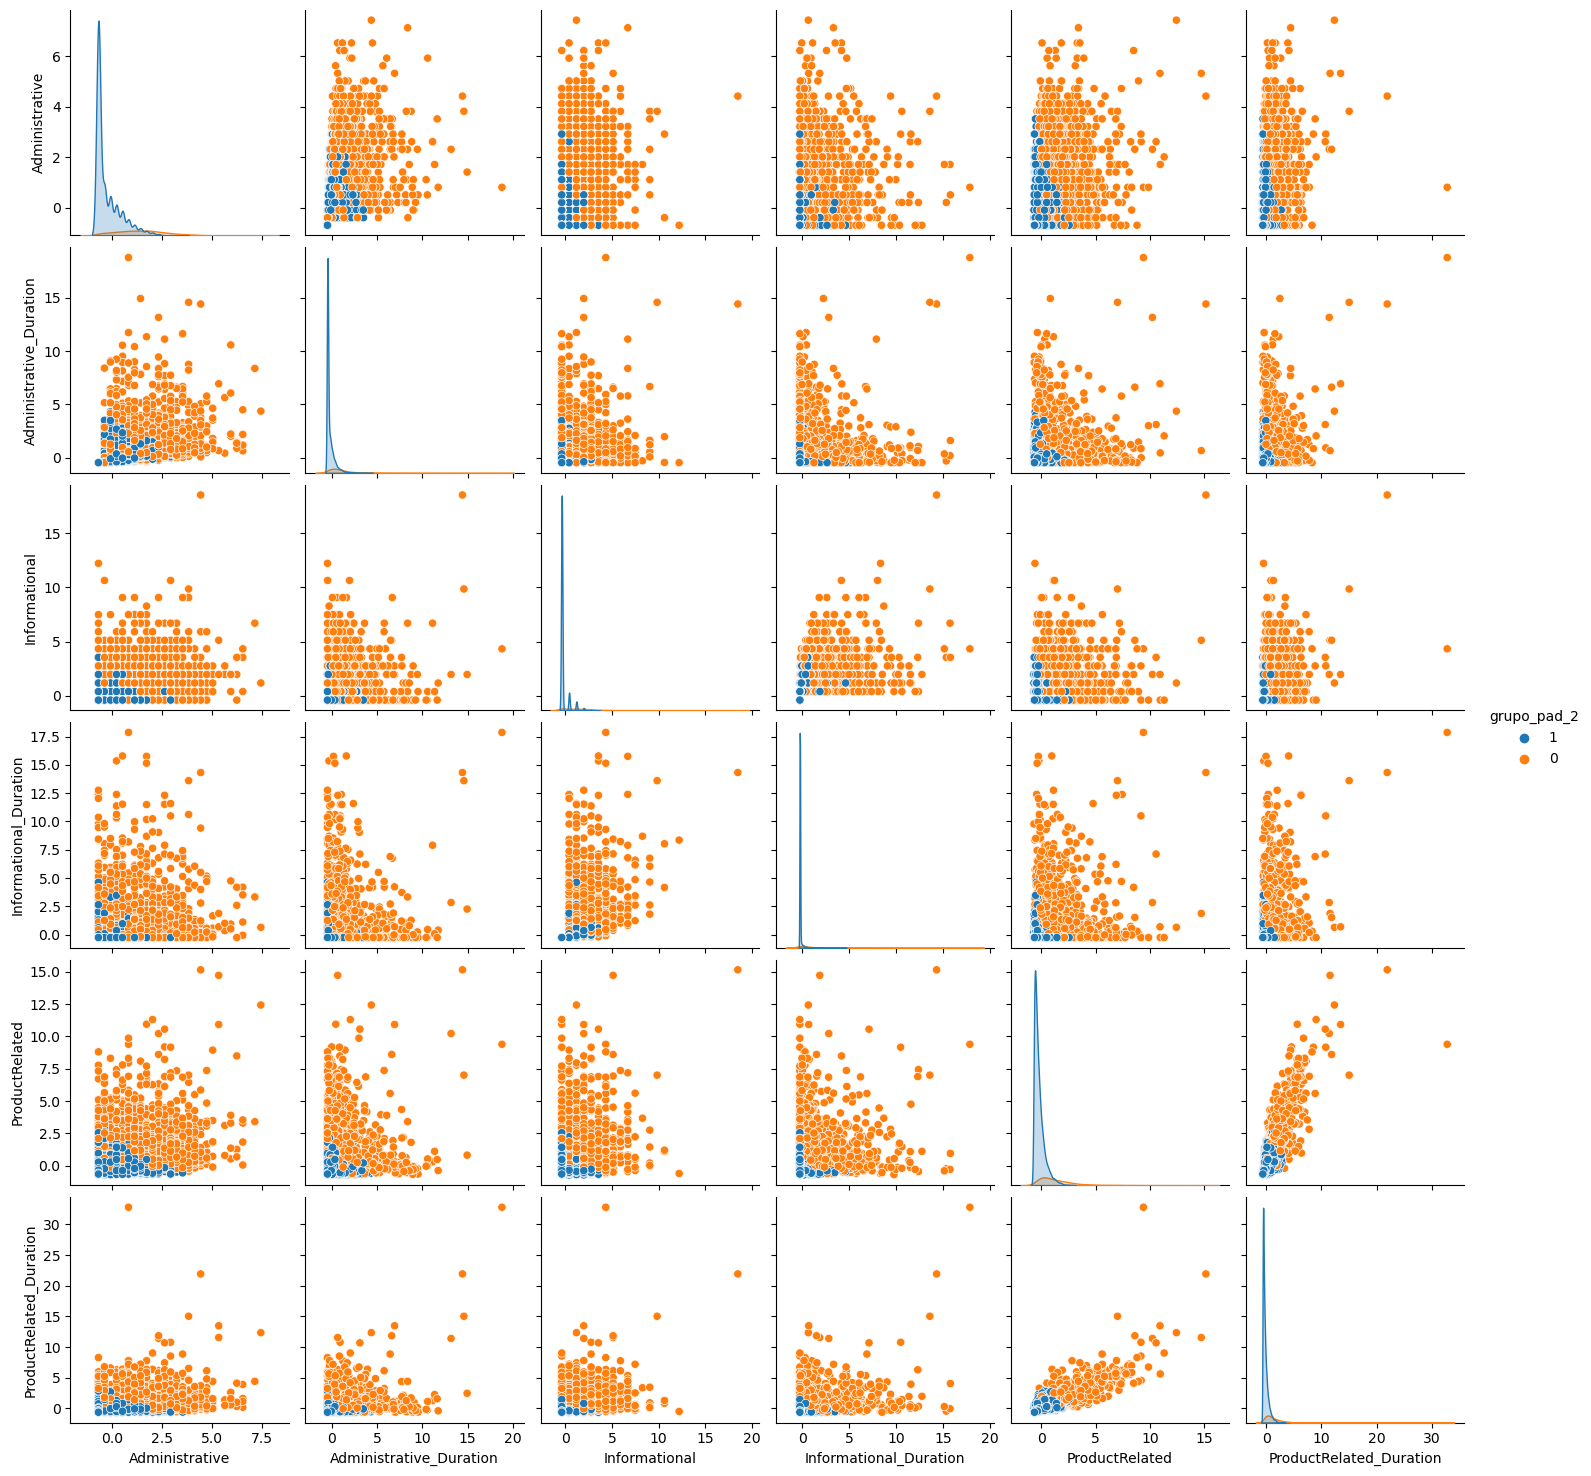

In [23]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(df2)
df2['grupo_pad_2'] = kmeans.labels_.astype('str')
sns.pairplot(df2, hue='grupo_pad_2')

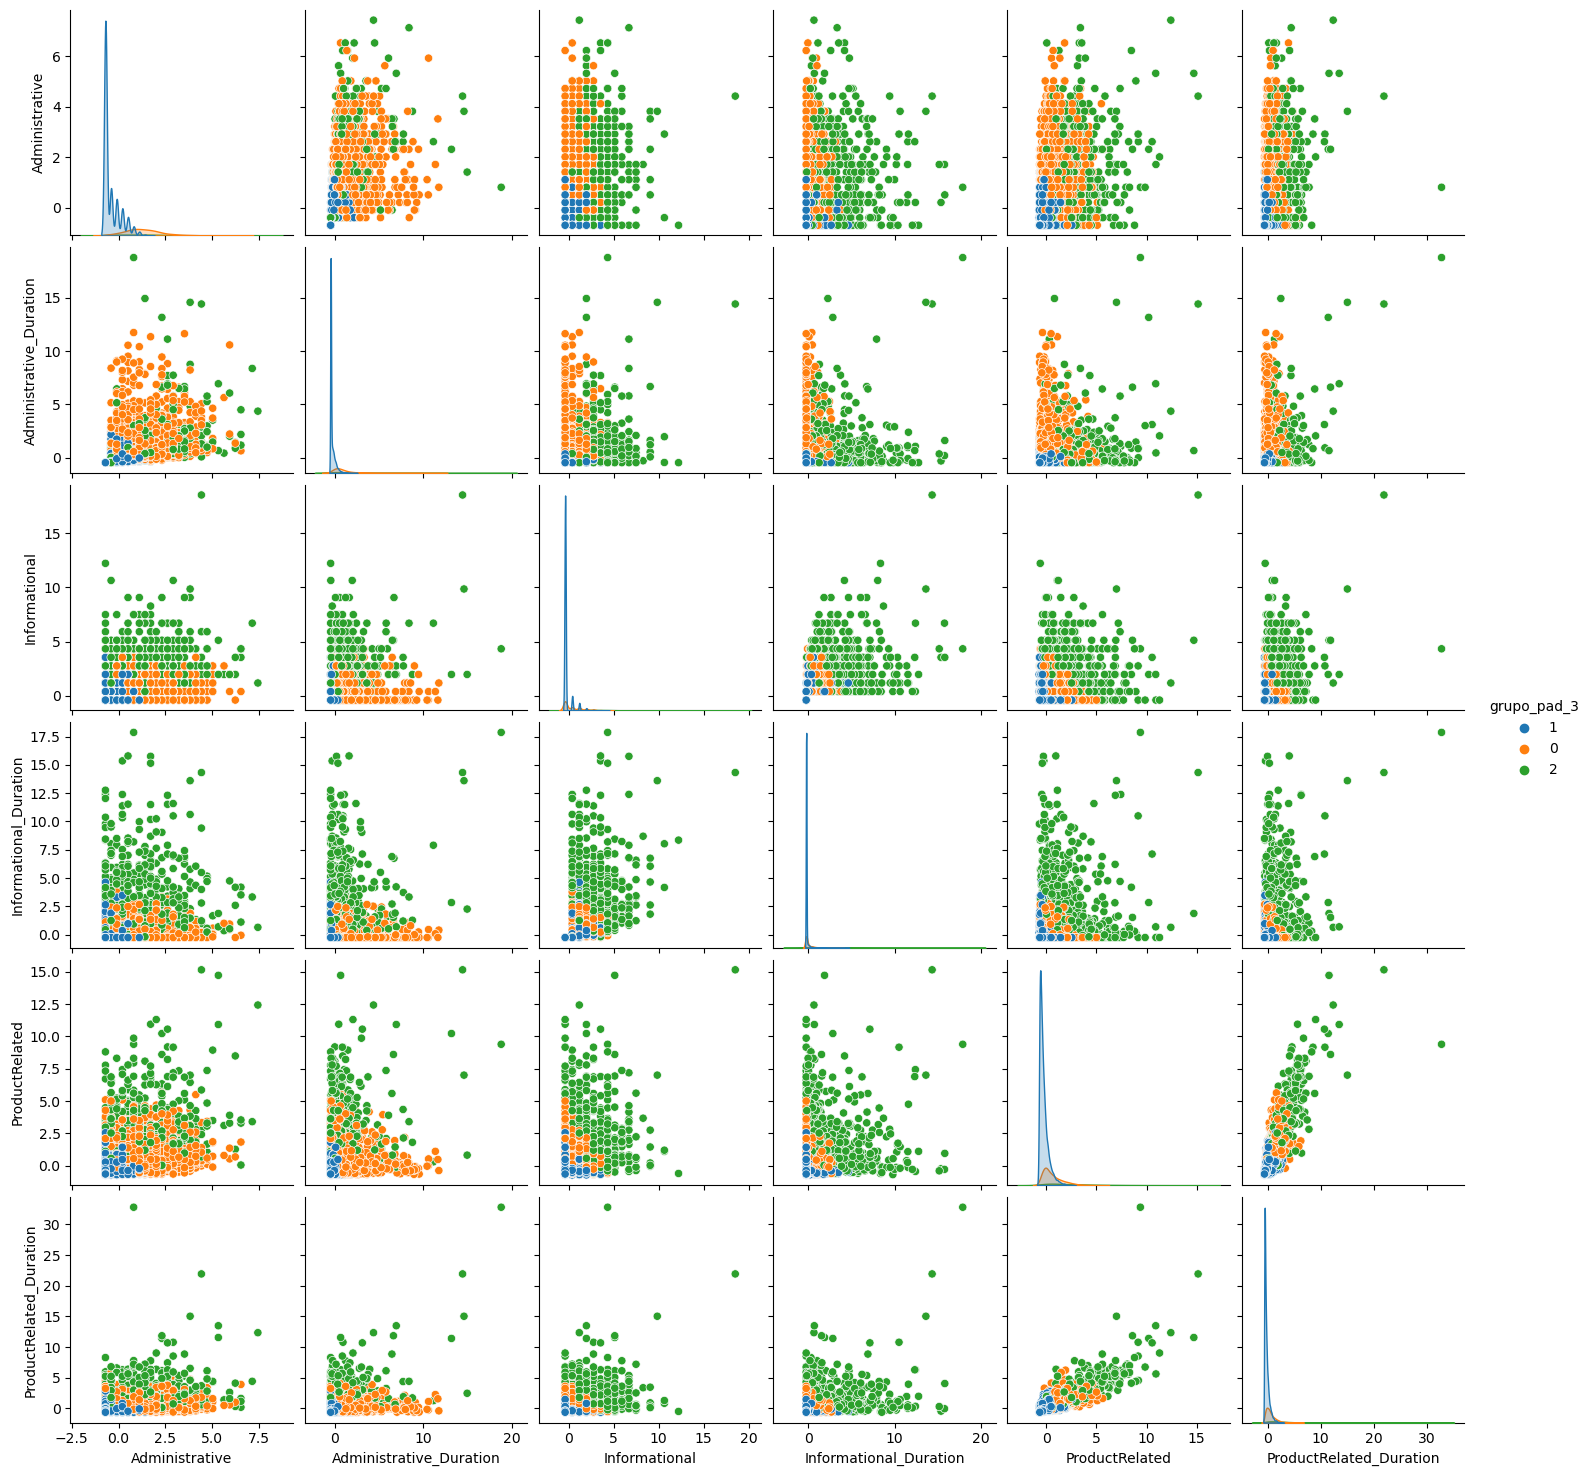

In [24]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(df2)
df2['grupo_pad_3'] = kmeans.labels_.astype('str')
sns.pairplot(df2, hue='grupo_pad_3')

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?



**BounceRates:	Percentual de visitantes que entram no site e saem sem acionar outros *requests durante a sessão**

**Revenue:	Indica se houve compra ou não**

In [98]:
data = df2[['Administrative', 'Administrative_Duration', 'Informational',
              'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'grupo_pad_3']]
            
data3 = df[['BounceRates', 'Revenue']]

data_concat = pd.concat([data, data3], axis = 1)

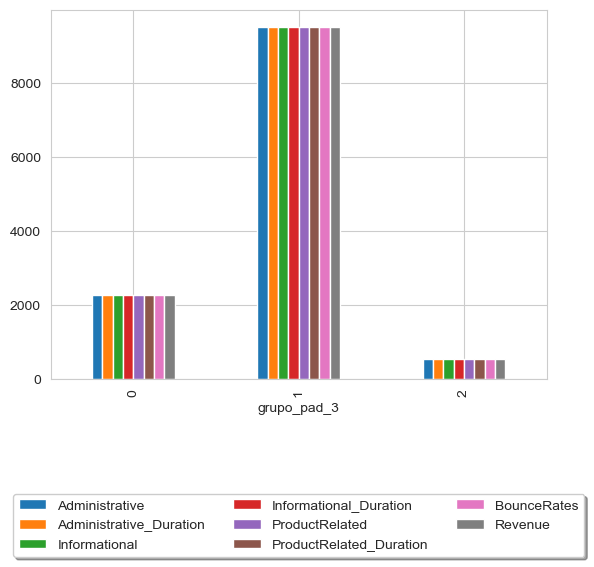

In [111]:
ax = data_concat2.groupby('grupo_pad_3').count().plot.bar()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

In [114]:
pd.crosstab(df.BounceRates, df2['grupo_pad_3'])

grupo_pad_3,0,1,2
BounceRates,,,
0.000000,783,4667,68
0.000027,1,0,0
0.000034,0,0,1
0.000038,0,0,1
0.000039,0,0,1
...,...,...,...
0.175000,0,1,0
0.176923,0,1,0
0.180000,0,5,0


In [115]:
pd.crosstab(df.Revenue, df2['grupo_pad_3'])

grupo_pad_3,0,1,2
Revenue,,,
False,1735,8308,379
True,548,1193,167


In [ ]:
# R. O grupo com clientes mais propensos à compra é o grupo 1.